# Boston Housing Data

Makr sure the file: housing.txt is in the same folder as this ipynb notebook.

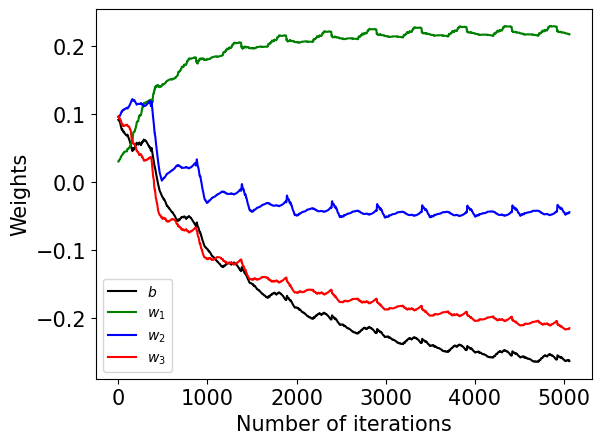

In [1]:
# 4: Backpropagation of errors - using the perceptron.
# Training Boston housing data (housing.txt). 
# The target is the value of a house (column 13).
# In this case, use 3 attributes (columns 5, 8, and 12).

import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('housing.txt')
rows, columns = data.shape
columns = 4  # Using 4 columns from the data in this case.

X = data[:, [5, 8, 12]]             # The three data coumns.
t = data[:, 13]                     # The target data.
ws1, ws2, ws3, ws4 = [], [], [], [] # Empty lists of weights.
k = 0

xmean = X.mean(axis=0)              # Normalize the data.
xstd = X.std(axis=0)
ones = np.array([np.ones(rows)])
X = (X - xmean * ones.T) / (xstd * ones.T)
X = np.c_[np.ones(rows), X]
tmean = (max(t) + min(t)) / 2
tstd = (max(t) - min(t)) / 2
t = (t - tmean) / tstd

w = 0.1 * np.random.random(columns)  # Set random weights.
y1 = np.tanh(X.dot(w))
e1 = t - y1
mse = np.var(e1)

num_epochs = 10  # Number of iterations is 506*num_epochs.
eta = 0.001      # The learning rate.
k = 1

# Backpropagation.
for m in range(num_epochs):
    for n in range(rows):
        yk = np.tanh(X[n, :].dot(w))
        err = yk - t[n]
        g = X[n, :].T * ((1 - yk**2) * err)
        w = w - eta*g
        k += 1
        ws1.append([k, np.array(w[0]).tolist()])
        ws2.append([k, np.array(w[1]).tolist()])
        ws3.append([k, np.array(w[2]).tolist()])
        ws4.append([k, np.array(w[3]).tolist()])

ws1 = np.array(ws1)
ws2 = np.array(ws2)
ws3 = np.array(ws3)
ws4 = np.array(ws4)

plt.plot(ws1[:, 0], ws1[:, 1], 'k', markersize=0.1,label = r"$b$")
plt.plot(ws2[:, 0], ws2[:, 1], 'g', markersize=0.1,label = r"$w_1$")
plt.plot(ws3[:, 0], ws3[:, 1], 'b', markersize=0.1,label = r"$w_2$")
plt.plot(ws4[:, 0], ws4[:, 1], 'r', markersize=0.1,label = r"$w_3$")
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Weights', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

In the figure above, the weights have converged after ten epochs (50600 iterations). The ANN can now be used to value other houses - as long as they are from 1978!

Decreasing $\eta$ will make the convergence slower but the errors in the weights will be smaller.

Increasing $\eta$ will make the convergence faster but the errors in the weights will be greater.

# End Program